In [17]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
from operator import concat
import igraph
import Surfaces
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter,
    nerve
)
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from functools import reduce

from Giotto2Mapper import two_dim_nerve, two_mapper
from CircularCover import CircularCover

# Cover Comparison
We want to compare visual differences between the `CubicalCover` in `giotto-tda`, and our newly constructed `CircularCover`.
We will compare over multiple parameters including `filter_func`, `n_intervals`, and `gain`. 
The different filters we will look at will be `sklearn.decomposition.PCA(n_components = 2)`, and `gtda.mapper.filter.Projection` to each plane $xy$, $xz$, and $yz$.
We will vary the `gain` from $0.1<g<0.5$, and `n_intervals` from $5<n<20$. 
Additionally we will look at these comparisons over both the genus 1 and genus 2 Torus.

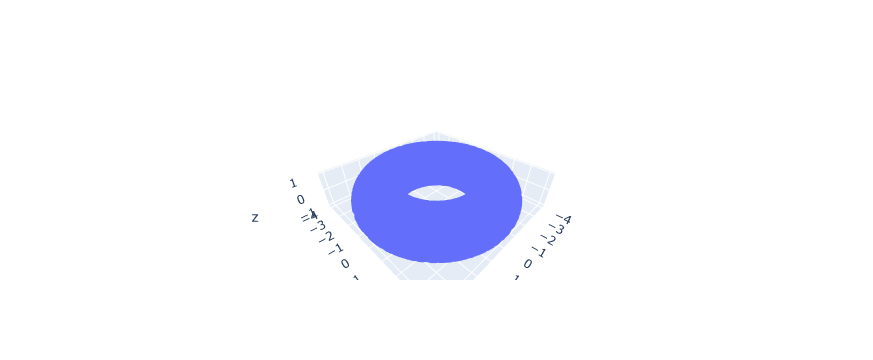

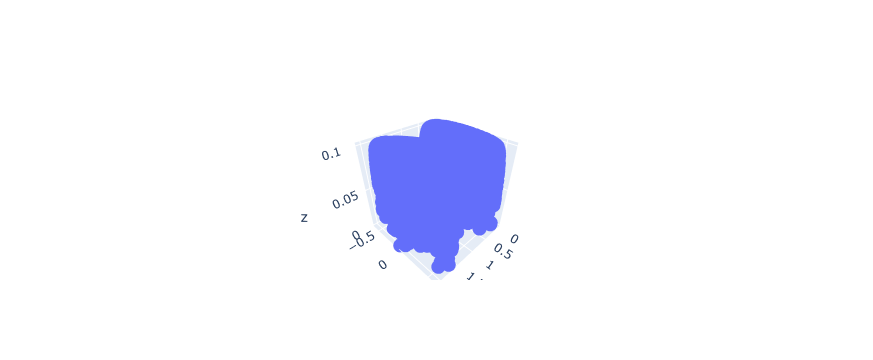

In [27]:
'Generate our data, we will use sa sample size of 5000'
g1data = Surfaces.sample_torus(5000)
g2data = Surfaces.sample_g2torus(5000)
g1pic = Surfaces.graph_sample(g1data)
g1pic = Surfaces.graph_sample(g2data)

### Generate Pipelines

In [63]:
gain = 0.5
gains = [0.1,0.3,0.5]
n_intervals = 10
n_intervals = [5,10,15,20]
# Define filter function – can be any scikit-learn transformer
xy_proj = Projection(columns=[0, 1])
xz_proj = Projection(columns=[0, 2])
yz_proj = Projection(columns=[1, 2])
pca = PCA(n_components = 2)
filter_list = [xy_proj, xz_proj, yz_proj, pca]
# Define cover
cube_covers = [CubicalCover(n_intervals=n, overlap_frac=gain) for n in n_intervals for gain in gains]
circle_covers = [CircularCover(n_intervals=n, overlap_frac=gain) for n in n_intervals for gain in gains]
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

pipelines = {}

In [78]:
for filter_func in filter_list:
    for cover in cube_covers + circle_covers:
        pipe = make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer,
            verbose=True,
            n_jobs=1,
            store_edge_elements=True
        )
        pipelines[f'{filter_func}_{cover}'] = pipe

### Generate 2Mapper graphs
Now generate our 2 Mapper graphs for each pipeline.

In [104]:
for pipe in pipelines:
    print(pipelines[pipe].get_params()['pullback_cover__map_and_cover__cover']) 

CubicalCover(n_intervals=5)
CubicalCover(n_intervals=5, overlap_frac=0.3)
CubicalCover(n_intervals=5, overlap_frac=0.5)
CubicalCover()
CubicalCover(overlap_frac=0.3)
CubicalCover(overlap_frac=0.5)
CubicalCover(n_intervals=15)
CubicalCover(n_intervals=15, overlap_frac=0.3)
CubicalCover(n_intervals=15, overlap_frac=0.5)
CubicalCover(n_intervals=20)
CubicalCover(n_intervals=20, overlap_frac=0.3)
CubicalCover(n_intervals=20, overlap_frac=0.5)
CircularCover(n_intervals=5)
CircularCover(n_intervals=5, overlap_frac=0.3)
CircularCover(n_intervals=5, overlap_frac=0.5)
CircularCover()
CircularCover(overlap_frac=0.3)
CircularCover(overlap_frac=0.5)
CircularCover(n_intervals=15)
CircularCover(n_intervals=15, overlap_frac=0.3)
CircularCover(n_intervals=15, overlap_frac=0.5)
CircularCover(n_intervals=20)
CircularCover(n_intervals=20, overlap_frac=0.3)
CircularCover(n_intervals=20, overlap_frac=0.5)
CubicalCover(n_intervals=5)
CubicalCover(n_intervals=5, overlap_frac=0.3)
CubicalCover(n_intervals=5, 

In [111]:
mappers = dict()
mappers['g1Torus'] = {}
mappers['g2Torus'] = {}
for pipe in pipelines:
    graph = pipelines[pipe].fit_transform(g1data)
    fig = plot_static_mapper_graph(pipelines[pipe], g1data, layout_dim=3)
    twomap = two_mapper(graph,fig)      
    mappers['g1Torus'][pipe] = twomap
    print('---------------------------------------------')

    graph = pipelines[pipe].fit_transform(g2data)
    fig = plot_static_mapper_graph(pipelines[pipe], g2data, layout_dim=3)
    twomap = two_mapper(graph,fig)      
    mappers['g2Torus'][pipe] = twomap
    print('---------------------------------------------')

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s
---------------------------------------------
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3

/home/hfriz/.local/lib/python3.8/site-packages/jupyter_client/session.py:716: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.8s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.8s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.7s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.7s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s
---------------------------------------------
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.5s
[Pipeline] .... (step 1 of 3) P

IndexError: index 129 is out of bounds for axis 0 with size 128

In [117]:
import pandas as pd

In [123]:
pd.DataFrame(pipelines, index=[0]).to_csv('cover_comparison_pipelines.csv')

In [ ]:
pd.DataFrame(mappers).to_csv('cover_comparison_mapper_graphs.csv')

In [25]:
g1_cube_comp = make_subplots(rows=2,cols=2, specs=[[{'type':'scene'},{'type':'scene'},{'type':'scene'},{'type':'scene'}]])
g1_cube_comp.add_trace(g1_cube_fig.data[0],row=1,col=1)
g1_cube_comp.add_trace(g1_cube_fig.data[1],row=1,col=1)
g1_cube_comp.add_trace(g1_cube_2map.data[0],row=1,col=2)
g1_cube_comp.add_trace(g1_cube_2map.data[1],row=1,col=2)
g1_cube_comp.add_trace(g1_cube_2map.data[2],row=1,col=2)
g1_cube_comp.update_layout(showlegend=False, height=900, title_text=f"Mapper of Torus with CubicalCover and {cube_cover.overlap_frac} gain.")
g1_cube_comp.show()

In [15]:
g1_circle_graph = circle_pipe.fit_transform(g1data)
g1_circle_fig = plot_static_mapper_graph(circle_pipe, g1data, layout_dim=3)
g1_circle_2map = two_mapper(g1_circle_graph,g1_circle_fig)

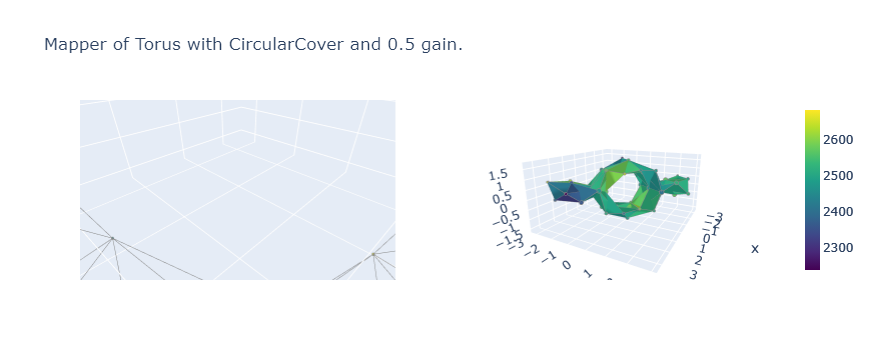

In [16]:
g1_circle_comp = make_subplots(rows=1,cols=2, specs=[[{'type':'scene'},{'type':'scene'}]])
g1_circle_comp.add_trace(g1_circle_fig.data[0],row=1,col=1)
g1_circle_comp.add_trace(g1_circle_fig.data[1],row=1,col=1)
g1_circle_comp.add_trace(g1_circle_2map.data[0],row=1,col=2)
g1_circle_comp.add_trace(g1_circle_2map.data[1],row=1,col=2)
g1_circle_comp.add_trace(g1_circle_2map.data[2],row=1,col=2)
g1_circle_comp.update_layout(showlegend=False, height=900, title_text = f"Mapper of Torus with CircularCover and {circle_cover.overlap_frac} gain.")
g1_circle_comp.show()

# Now with Genus 2 Torus

In [9]:
g2_cube_graph = cube_pipe.fit_transform(g2data)
g2_cube_fig = plot_static_mapper_graph(cube_pipe, g2data, layout_dim=3)
g2_cube_2map = two_mapper(g2_cube_graph,g2_cube_fig)
g2_circle_graph = circle_pipe.fit_transform(g2data)
g2_circle_fig = plot_static_mapper_graph(circle_pipe, g2data, layout_dim=3)
g2_circle_2map = two_mapper(g2_circle_graph,g2_circle_fig)

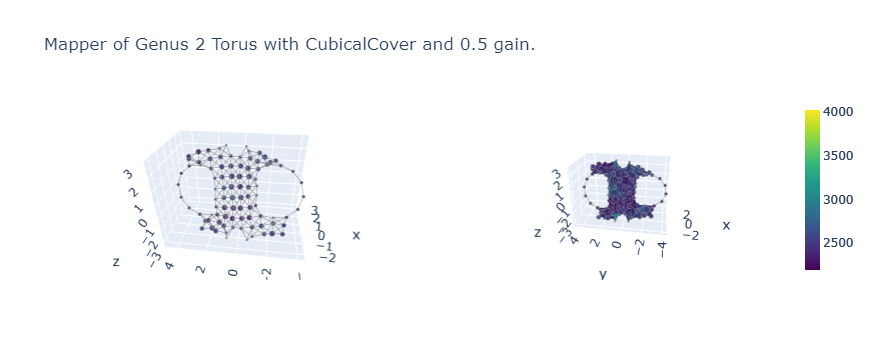

In [10]:
g2_cube_comp = make_subplots(rows=1,cols=2, specs=[[{'type':'scene'},{'type':'scene'}]])
g2_cube_comp.add_trace(g2_cube_fig.data[0],row=1,col=1)
g2_cube_comp.add_trace(g2_cube_fig.data[1],row=1,col=1)
g2_cube_comp.add_trace(g2_cube_2map.data[0],row=1,col=2)
g2_cube_comp.add_trace(g2_cube_2map.data[1],row=1,col=2)
g2_cube_comp.add_trace(g2_cube_2map.data[2],row=1,col=2)
g2_cube_comp.update_layout(showlegend=False, height=900, title_text=f"Mapper of Genus 2 Torus with CubicalCover and {cube_cover.overlap_frac} gain.")
g2_cube_comp.show()

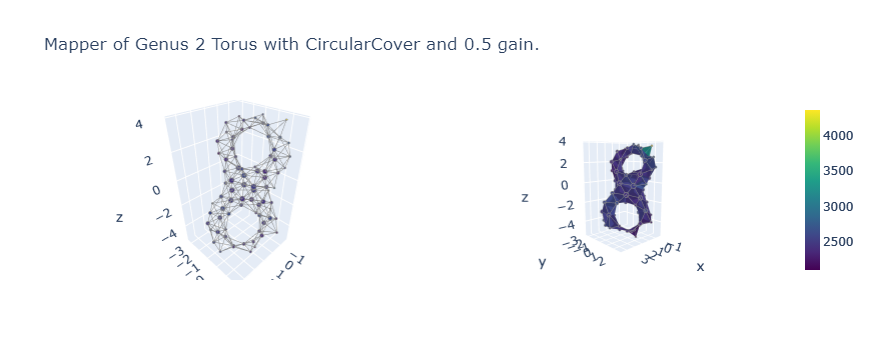

In [11]:
g2_circle_comp = make_subplots(rows=1,cols=2, specs=[[{'type':'scene'},{'type':'scene'}]])
g2_circle_comp.add_trace(g2_circle_fig.data[0],row=1,col=1)
g2_circle_comp.add_trace(g2_circle_fig.data[1],row=1,col=1)
g2_circle_comp.add_trace(g2_circle_2map.data[0],row=1,col=2)
g2_circle_comp.add_trace(g2_circle_2map.data[1],row=1,col=2)
g2_circle_comp.add_trace(g2_circle_2map.data[2],row=1,col=2)
g2_circle_comp.update_layout(showlegend=False, height=900, title_text = f"Mapper of Genus 2 Torus with CircularCover and {circle_cover.overlap_frac} gain.")
g2_circle_comp.show()